In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Reading csv file form the folder
# source = https://www.kaggle.com/datasets/architsharma01/loan-approval-prediction-dataset
df = pd.read_csv("dataset/preprocessed_data.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [4]:
df.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [5]:
df.head(5)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [6]:
# checking number of unique datatypes in columns with dtype object/ categorical datatypes
df["education"].unique()

array([' Graduate', ' Not Graduate'], dtype=object)

In [7]:
df["self_employed"].unique()

array([' No', ' Yes'], dtype=object)

In [8]:
df["loan_status"].unique()

array([' Approved', ' Rejected'], dtype=object)

In [9]:
# All object columns have only two unique values so using label encoding
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to the 'Gender' column
df['education'] = label_encoder.fit_transform(df['education'])
df['self_employed'] = label_encoder.fit_transform(df['self_employed'])
df['loan_status'] = label_encoder.fit_transform(df['loan_status'])

df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,2,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,4,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,0,1,1000000,2300000,12,317,2800000,500000,3300000,800000,1
4265,4266,0,1,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000,0
4266,4267,2,1,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000,1
4267,4268,1,1,0,4100000,12800000,8,780,8200000,700000,14100000,5800000,0


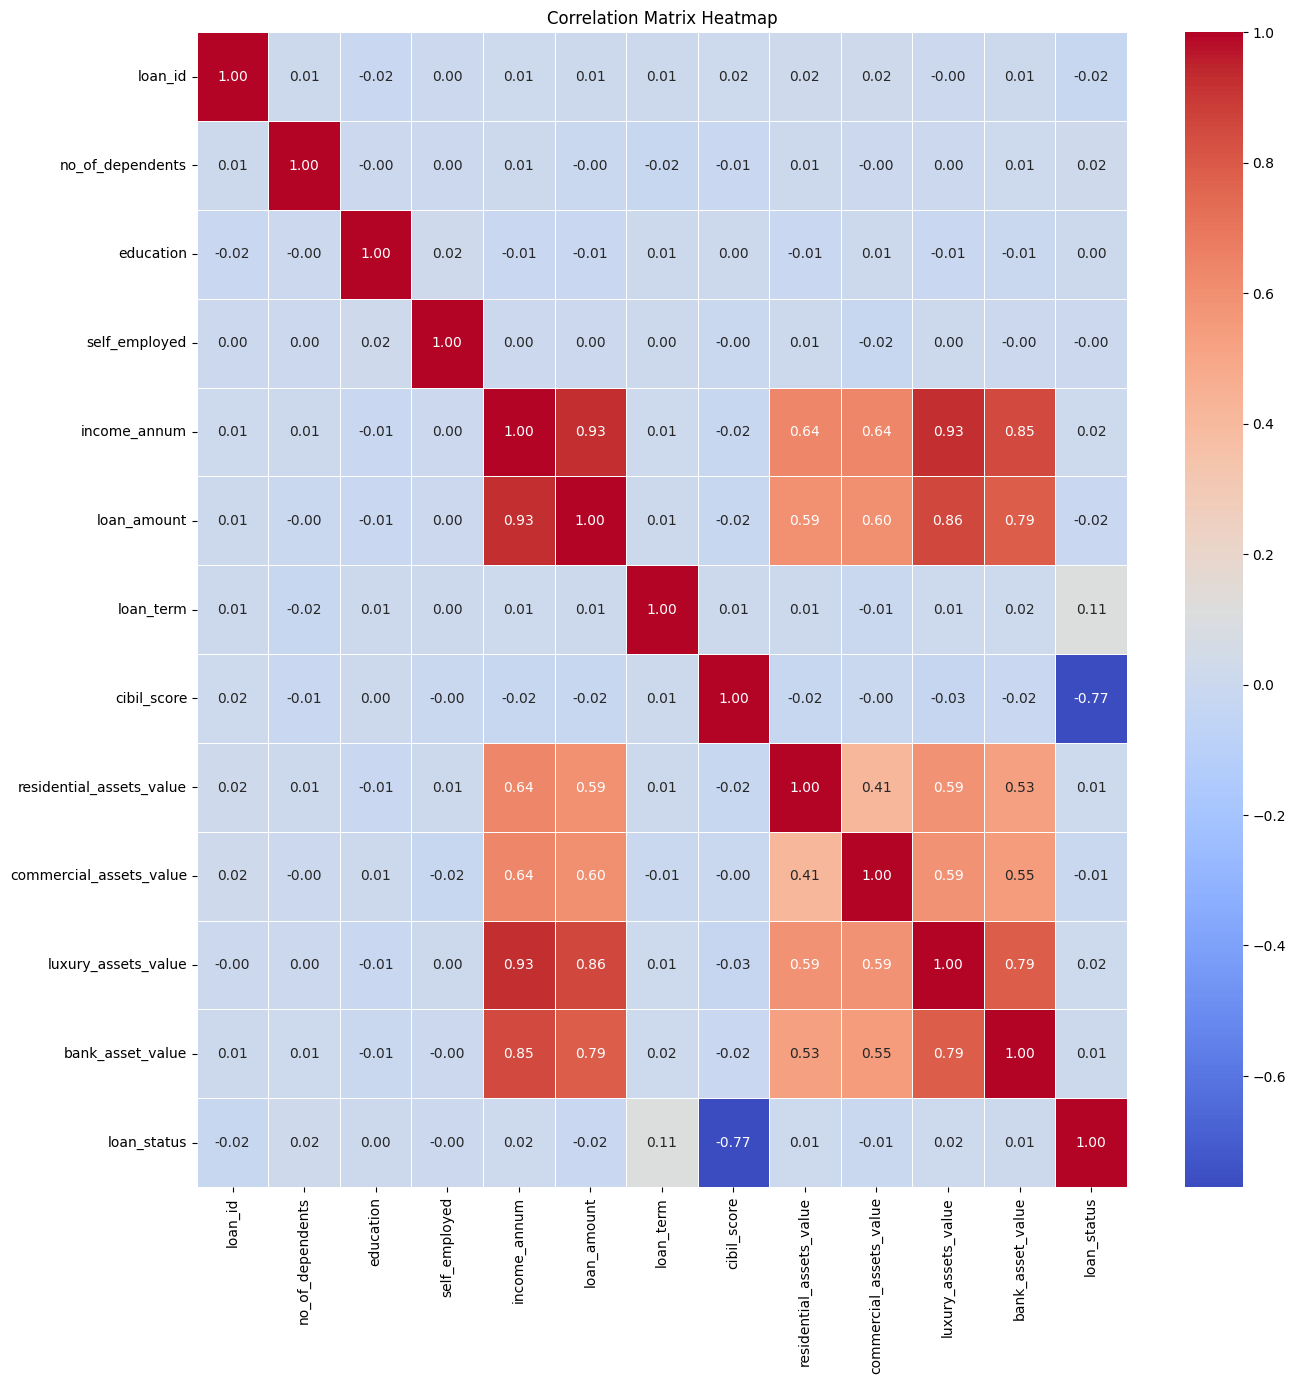

In [10]:
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [11]:
# high correlation is observed in the following columns
columns = ['income_annum', 'loan_amount', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']
df[columns]

,income_annum,loan_amount,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,9600000,29900000,2400000,17600000,22700000,8000000
1,4100000,12200000,2700000,2200000,8800000,3300000
2,9100000,29700000,7100000,4500000,33300000,12800000
3,8200000,30700000,18200000,3300000,23300000,7900000
4,9800000,24200000,12400000,8200000,29400000,5000000
...,...,...,...,...,...,...
4264,1000000,2300000,2800000,500000,3300000,800000
4265,3300000,11300000,4200000,2900000,11000000,1900000
4266,6500000,23900000,1200000,12400000,18100000,7300000
4267,4100000,12800000,8200000,700000,14100000,5800000


# now performing feature engineering by merging different columns

In [12]:
# we are merging different assets values as total_assets_value as following features of assets_values have high corelation
df['total_assets_value'] = (df['residential_assets_value'] + df['commercial_assets_value'] + df['luxury_assets_value'] + df['bank_asset_value'])

# income to loan ratio
df['income_to_loan_ratio'] = df['income_annum'] / df['loan_amount']

# asssets to loan ratio
df['assets_to_loan_ratio'] = df['total_assets_value'] / df['loan_amount']


In [13]:
df.skew()

loan_id                     0.000000
no_of_dependents           -0.017971
education                   0.008905
self_employed              -0.014529
income_annum               -0.012814
loan_amount                 0.308724
loan_term                   0.036359
cibil_score                -0.009039
residential_assets_value    0.978451
commercial_assets_value     0.957791
luxury_assets_value         0.322208
bank_asset_value            0.560725
loan_status                 0.504087
total_assets_value          0.297241
income_to_loan_ratio        0.627068
assets_to_loan_ratio        0.670502
dtype: float64

In [14]:
df.head(5)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,total_assets_value,income_to_loan_ratio,assets_to_loan_ratio
0,1,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0,50700000,0.321070,1.695652
1,2,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1,17000000,0.336066,1.393443
2,3,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1,57700000,0.306397,1.942761
3,4,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1,52700000,0.267101,1.716612
4,5,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1,55000000,0.404959,2.272727


# input and target feature selections

In [15]:
df.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status',
       'total_assets_value', 'income_to_loan_ratio', 'assets_to_loan_ratio'],
      dtype='object')

In [16]:
# the feature/columns below are going to be used for input
numeric_columns = ['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score','total_assets_value', 'income_to_loan_ratio', 'assets_to_loan_ratio']
encoded_categorical_columns = ['education', 'self_employed']

#target = ['loan_status']

In [17]:
# standardizing all numerica features so each feature contribute equally for classification
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
standardized_numeric_columns = scaler.fit_transform(df[numeric_columns])

In [ ]:
import joblib

# Save the scaler to a file
joblib.dump(scaler, 'streamlit/model/scaler.pkl')

In [19]:
# Separating features and target
# merging numeric features after standardization to already encoded categorical features
inputs = np.hstack((standardized_numeric_columns, df[encoded_categorical_columns]))

# now extracting the columns names to reassign them appropriately
all_feature_names = numeric_columns + encoded_categorical_columns
X = pd.DataFrame(inputs, columns=all_feature_names)
# sorting the columns for easy feature assignment during implementation
X = X[sorted(X.columns)]
y = df['loan_status']

X


,assets_to_loan_ratio,cibil_score,education,income_annum,income_to_loan_ratio,loan_amount,loan_term,no_of_dependents,self_employed,total_assets_value
0,-0.833728,1.032792,0.0,1.617979,-0.383614,1.633052,0.192617,-0.294102,0.0,0.930628
1,-1.303677,-1.061051,1.0,-0.341750,-0.181519,-0.324414,-0.508091,-1.473548,1.0,-0.797198
2,-0.449464,-0.544840,0.0,1.439822,-0.581364,1.610933,1.594031,0.295621,0.0,1.289524
3,-0.801134,-0.771045,0.0,1.119139,-1.110968,1.721525,-0.508091,0.295621,0.0,1.033170
4,0.063648,-1.264055,1.0,1.689242,0.746968,1.002681,1.594031,1.475067,1.0,1.151093
...,...,...,...,...,...,...,...,...,...,...
4264,1.532641,-1.641063,0.0,-1.446324,1.148911,-1.419268,0.192617,1.475067,1.0,-1.289398
4265,-0.718252,-0.237434,1.0,-0.626801,-0.774922,-0.423946,1.594031,-1.473548,1.0,-0.643386
4266,-0.933022,-0.829046,1.0,0.513405,-1.045394,0.969504,1.243677,-0.294102,0.0,0.330760
4267,0.028306,1.044393,1.0,-0.341750,-0.393826,-0.258059,-0.508091,-0.883825,0.0,-0.192202


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


# Logestic regression

In [21]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [22]:
from sklearn import metrics
y_prediction = log_reg.predict(X_test)

In [23]:
print("accuracy: ", metrics.accuracy_score(y_prediction, y_test))
print("precision: ", metrics.precision_score(y_test, y_prediction, average='macro'))
print("Recall: ", metrics.recall_score(y_test, y_prediction, average='macro'))
print("F1 Score: ", metrics.f1_score(y_test, y_prediction, average='macro'))

accuracy:  0.8981264637002342
precision:  0.8924132336134254
Recall:  0.8887871960949967
F1 Score:  0.8905275007330287


# logeistic regression with regulirization

In [24]:
from sklearn.linear_model import LogisticRegression

log_reg_reg = LogisticRegression(penalty='l2')
log_reg_reg.fit(X_train, y_train)


LogisticRegression()

In [25]:
from sklearn import metrics
y_prediction = log_reg_reg.predict(X_test)

In [26]:
print("accuracy: ", metrics.accuracy_score(y_prediction, y_test))
print("precision: ", metrics.precision_score(y_test, y_prediction, average='macro'))
print("Recall: ", metrics.recall_score(y_test, y_prediction, average='macro'))
print("F1 Score: ", metrics.f1_score(y_test, y_prediction, average='macro'))

accuracy:  0.8981264637002342
precision:  0.8924132336134254
Recall:  0.8887871960949967
F1 Score:  0.8905275007330287


# Decision Tree classifier

In [27]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [28]:
from sklearn import metrics
y_prediction = decision_tree.predict(X_test)

In [29]:
print("accuracy: ", metrics.accuracy_score(y_prediction, y_test))
print("precision: ", metrics.precision_score(y_test, y_prediction, average='macro'))
print("Recall: ", metrics.recall_score(y_test, y_prediction, average='macro'))
print("F1 Score: ", metrics.f1_score(y_test, y_prediction, average='macro'))

accuracy:  1.0
precision:  1.0
Recall:  1.0
F1 Score:  1.0


# Random forest classifier

In [30]:

from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [31]:
from sklearn import metrics
y_prediction = rf_classifier.predict(X_test)

In [32]:
print("accuracy: ", metrics.accuracy_score(y_prediction, y_test))
print("precision: ", metrics.precision_score(y_test, y_prediction, average='macro'))
print("Recall: ", metrics.recall_score(y_test, y_prediction, average='macro'))
print("F1 Score: ", metrics.f1_score(y_test, y_prediction, average='macro'))

accuracy:  1.0
precision:  1.0
Recall:  1.0
F1 Score:  1.0


In [33]:
# Save the model to a file
joblib.dump(rf_classifier, 'model/random_forest_classifier.pkl')
# # Load the model from the file
# loaded_rf_classifier = joblib.load('model/random_forest_classifier.pkl')

# # Now you can use loaded_rf_classifier to make predictions
# y_pred = loaded_rf_classifier.predict(X_test)

['model/random_forest_classifier.pkl']

# Naive Bayes (Gaussian Naive Bayes)

In [34]:
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

GaussianNB()

In [35]:
y_prediction = nb_classifier.predict(X_test)

In [36]:
print("accuracy: ", metrics.accuracy_score(y_prediction, y_test))
print("precision: ", metrics.precision_score(y_test, y_prediction, average='macro'))
print("Recall: ", metrics.recall_score(y_test, y_prediction, average='macro'))
print("F1 Score: ", metrics.f1_score(y_test, y_prediction, average='macro'))

accuracy:  0.9379391100702577
precision:  0.9307147838817704
Recall:  0.9384093682530743
F1 Score:  0.9342224392427341
